## Setup & Load Data

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
gpus

[]

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\jason\AppData\Local\Temp\ipykernel_2788\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
for gpu in gpus:
    # Avoid out of memory errors by setting GPU Mem Consumption Limit
        try:
            tf.config.experimental.set_memory_growth(gpu, True)
        except:
            print("Required hardware not detected!")

In [5]:
img = cv2.imread(os.path.join('data', 'happy' , "35438_hd.jpg"))
img.shape

(649, 1240, 3)

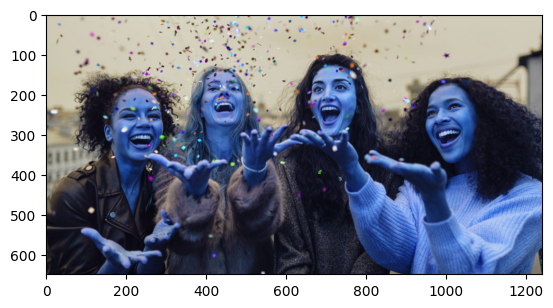

In [6]:
plt.imshow(img)

In [7]:
data_dir = "data"

In [8]:
os.listdir(data_dir)

['happy', 'sad']

In [9]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        #print(image_path)
        try:
            #img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            #print("Tip = " + tip)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Invalid image: {}".format(image_path))
        
            

## Load Data

In [11]:
import numpy as np


In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 144 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
len(batch) # contains images and labels (classes)

2

In [16]:
batch[0].shape

(32, 256, 256, 3)

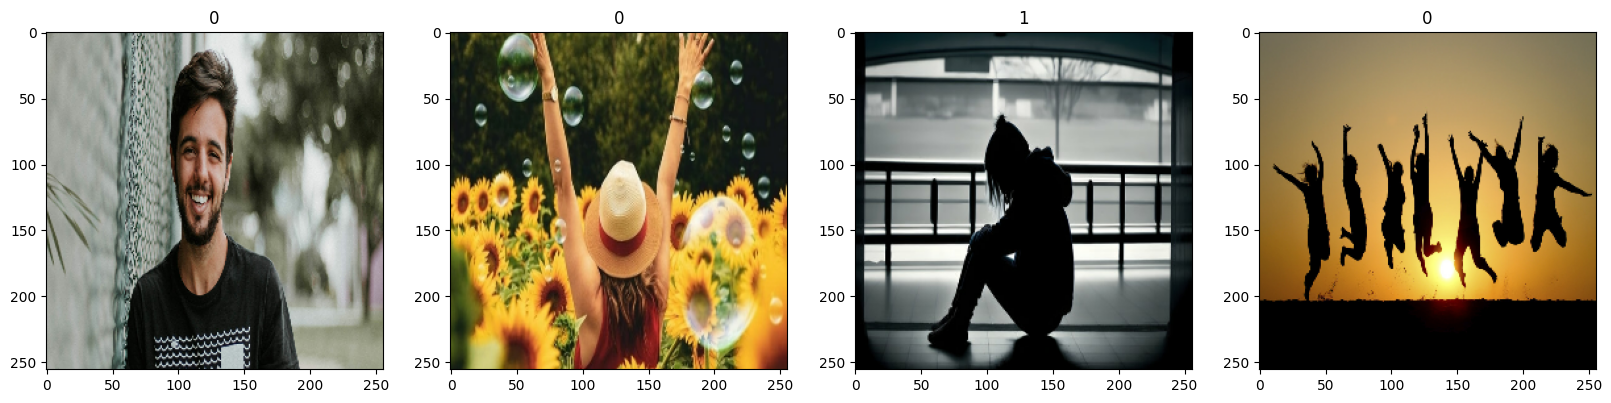

In [17]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing

In [18]:
# scale data
data = data.map(lambda x,y: (x/255, y))

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()

In [21]:
batch[0].max()

1.0

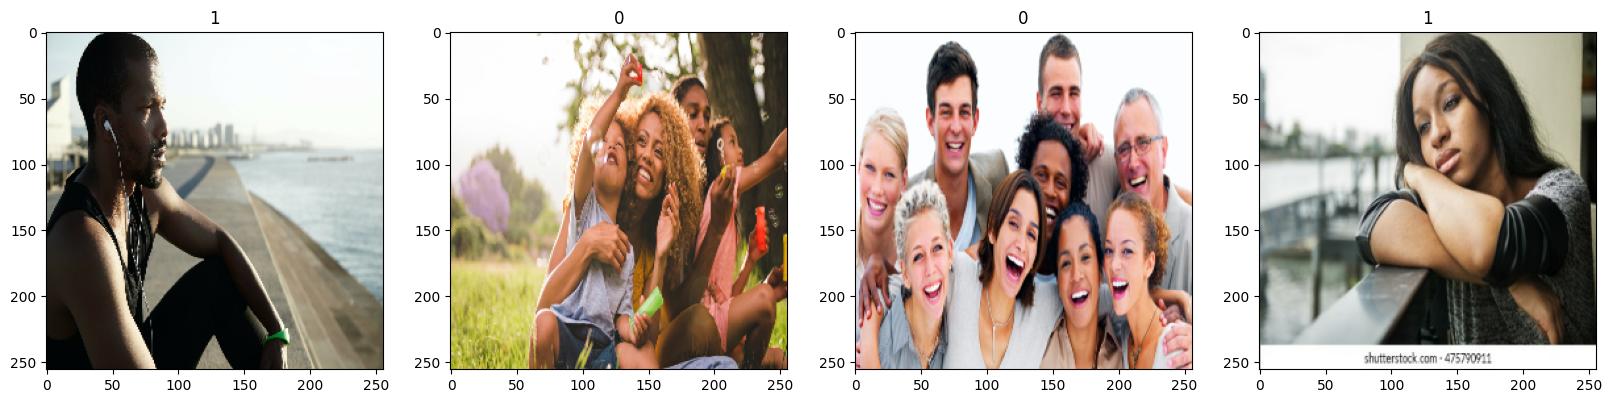

In [22]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [23]:
train_size = int(len(data) * .5) #60 % is for training
val_size = (int(len(data) * .28)) + 1
test_size = (int(len(data)*.22)) + 1
train_size

2

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## Build Deep Learning Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [29]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20


2/2 [==============================] - 7s 3s/step - loss: 0.6932 - accuracy: 0.5156 - val_loss: 1.9084 - val_accuracy: 0.5312
Epoch 2/20
2/2 [==============================] - 4s 2s/step - loss: 1.1954 - accuracy: 0.6094 - val_loss: 1.7086 - val_accuracy: 0.4062
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 1.3849 - accuracy: 0.4375 - val_loss: 0.6225 - val_accuracy: 0.7656
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 0.6238 - accuracy: 0.7812 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 4s 2s/step - loss: 0.6630 - accuracy: 0.5625 - val_loss: 0.6070 - val_accuracy: 0.7812
Epoch 6/20
2/2 [==============================] - 4s 2s/step - loss: 0.6754 - accuracy: 0.5938 - val_loss: 0.5961 - val_accuracy: 0.6406
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.5908 - accuracy: 0.7500 - val_loss: 0.5647 - val_accuracy: 0.6719
Epoch 8/20
2/2 [=======================

In [31]:
hist.history

{'loss': [0.693198561668396,
  1.1953556537628174,
  1.3849451541900635,
  0.6237596869468689,
  0.6629669666290283,
  0.6754201650619507,
  0.5908001661300659,
  0.5683901906013489,
  0.52609783411026,
  0.5971722602844238,
  0.5816840529441833,
  0.5134543776512146,
  0.5087124109268188,
  0.5033202767372131,
  0.46933722496032715,
  0.39902782440185547,
  0.3569427728652954,
  0.2962993085384369,
  0.38267335295677185,
  0.28987136483192444],
 'accuracy': [0.515625,
  0.609375,
  0.4375,
  0.78125,
  0.5625,
  0.59375,
  0.75,
  0.71875,
  0.71875,
  0.65625,
  0.734375,
  0.796875,
  0.78125,
  0.6875,
  0.8125,
  0.859375,
  0.859375,
  0.9375,
  0.796875,
  0.90625],
 'val_loss': [1.908440351486206,
  1.7086161375045776,
  0.6225380301475525,
  0.7073414325714111,
  0.6069780588150024,
  0.5961008071899414,
  0.5647256374359131,
  0.6297461986541748,
  0.5829366445541382,
  0.5315074920654297,
  0.432326078414917,
  0.4297023415565491,
  0.4297197461128235,
  0.5010560750961304,


## Plot performance

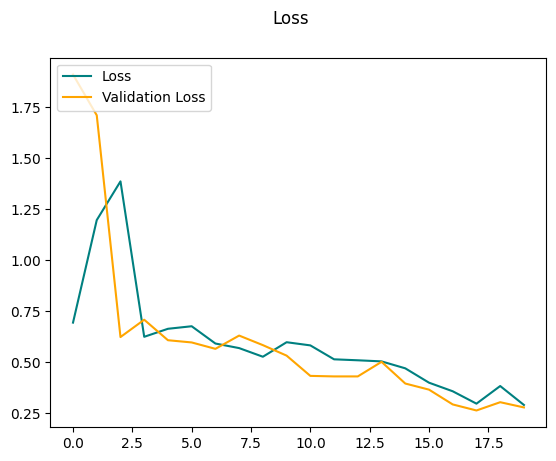

In [32]:
# Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'Loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'Validation Loss')
plt.suptitle('Loss')
plt.legend(loc = "upper left")

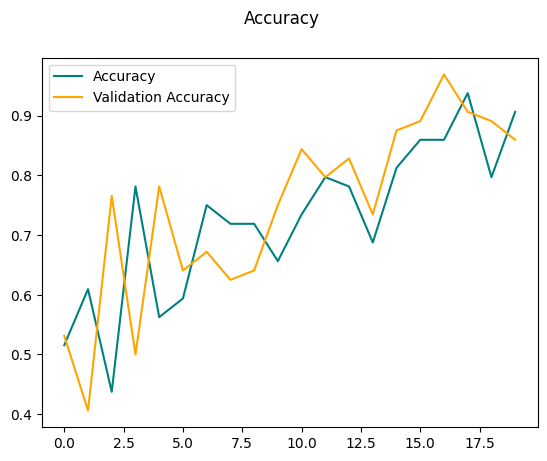

In [33]:
# Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'Validation Accuracy')
plt.suptitle('Accuracy')
plt.legend(loc = "upper left")

## Evaluate performance on test partition

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 286ms/step


In [37]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.75, Accuracy: 0.875


## Test on new image

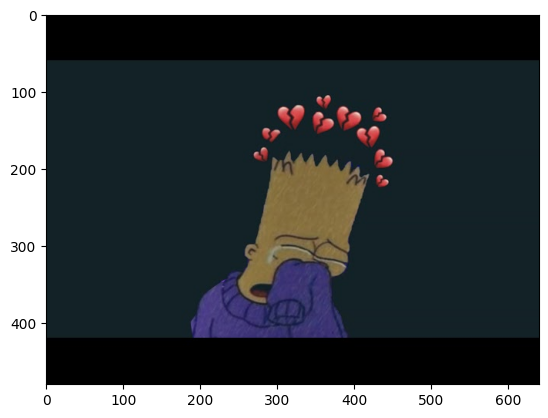

In [38]:
img = cv2.imread("sad_test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

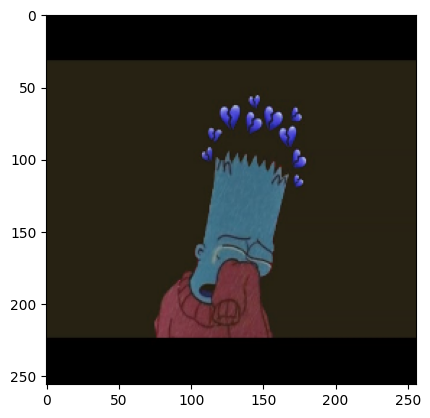

In [39]:
# resize image for CNN
resized = tf.image.resize(img, (256, 256))
plt.imshow(resized.numpy().astype(int))

In [40]:
yhat = model.predict(np.expand_dims(resized/255, 0))
if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print("Predicted class is Happy")

1/1 [==============================] - 0s 53ms/step
Predicted class is Sad


## Save Model

In [41]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'happysadmodel.h5'))
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))


C:\Users\jason\miniconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined